<a href="https://colab.research.google.com/github/prachigupta2006/feature-engineering/blob/main/missing_data_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data_science_job.csv to data_science_job.csv


In [4]:
df= pd.read_csv('data_science_job.csv')


In [5]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [6]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


few columns like "gender","company size" and "company type" has missing values of 23,30and32 for which we cant remove it as imp obsevations will be removed aswell

but columns with less missing values like "city_development_index" ,"enrolled_university","education_level" and "training_hours" can be removed due to less missing observations and has a scope to apply CCA.

In [7]:
df.shape

(19158, 13)

**To check cols having less than 5% missing values**

In [8]:
cols = [var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
13685,0.624,no_enrollment,Graduate,11.0,22.0
1636,0.920,no_enrollment,Graduate,20.0,68.0
16268,0.722,no_enrollment,High School,3.0,18.0
12816,0.920,no_enrollment,Graduate,20.0,13.0
6176,0.624,Full time course,Masters,3.0,30.0


to check how much % of data will be there after removing the missing data

In [10]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [11]:
new_df = df[cols].dropna()

In [12]:
df.shape , new_df.shape

((19158, 13), (17182, 5))

**plotting histogram of new data frame we made after removing missing data.**

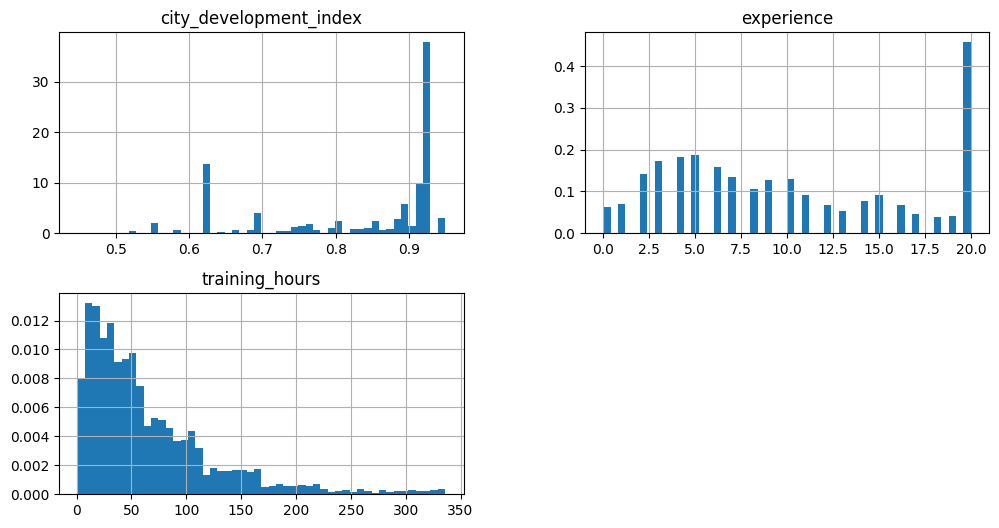

In [13]:
new_df.hist(bins=50,density=True,figsize=(12,6))
plt.show()

**ON TRAINING HOURS**

**histogram plotting of before and after removing:**

Text(0.5, 1.0, 'after removing missing values')

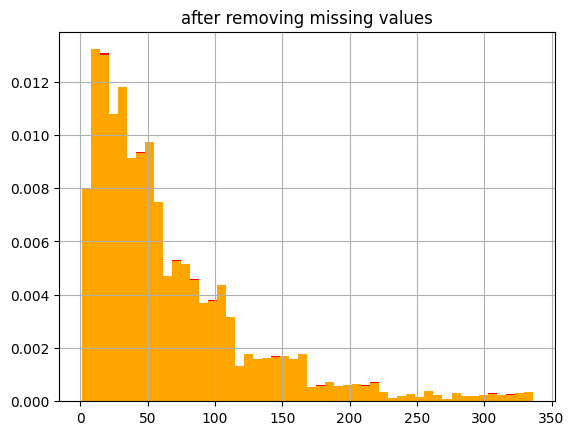

In [14]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original data
df['training_hours'].hist(bins=50,ax=ax,density=True,color='red')
plt.title('before removing missing values')

#new data with cca application
new_df['training_hours'].hist(bins=50,ax=ax,density=True,color='orange')
plt.title('after removing missing values')


**density plotting of before and after removing:**

<Axes: ylabel='Density'>

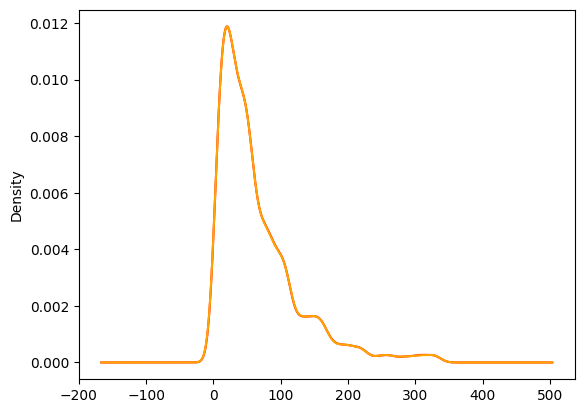

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original data
df['training_hours'].plot.density(color='red')

#new data with cca application
new_df['training_hours'].plot.density(color='orange')



**ON CITY_DEVLOPMENT_INDEX**

**historam plotting of before and after removing:**

Text(0.5, 1.0, 'after removing missing values')

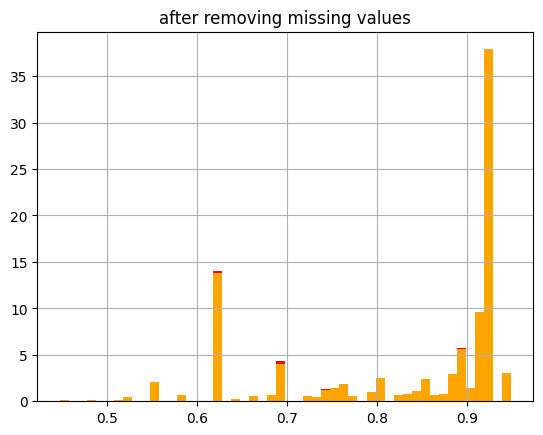

In [16]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original data
df['city_development_index'].hist(bins=50,ax=ax,density=True,color='red')
plt.title('before removing missing values')

#new data with cca application
new_df['city_development_index'].hist(bins=50,ax=ax,density=True,color='orange')
plt.title('after removing missing values')


**density plotting of before and after removing:**

<Axes: ylabel='Density'>

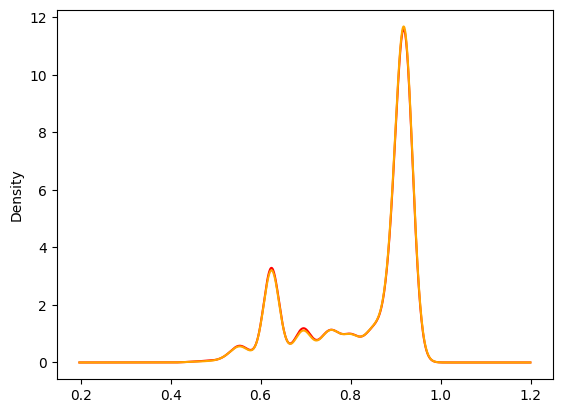

In [17]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original data
df['city_development_index'].plot.density(color='red')

#new data with cca application
new_df['city_development_index'].plot.density(color='orange')

**ON EXPERIENCE**

**historam plotting of before and after removing:**

Text(0.5, 1.0, 'after removing missing values')

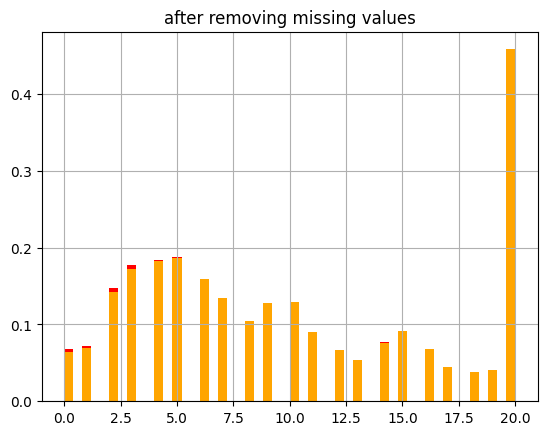

In [18]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original data
df['experience'].hist(bins=50,ax=ax,density=True,color='red')
plt.title('before removing missing values')

#new data with cca application
new_df['experience'].hist(bins=50,ax=ax,density=True,color='orange')
plt.title('after removing missing values')

**density plotting of before and after removing:**

Text(0.5, 1.0, 'after removing missing values')

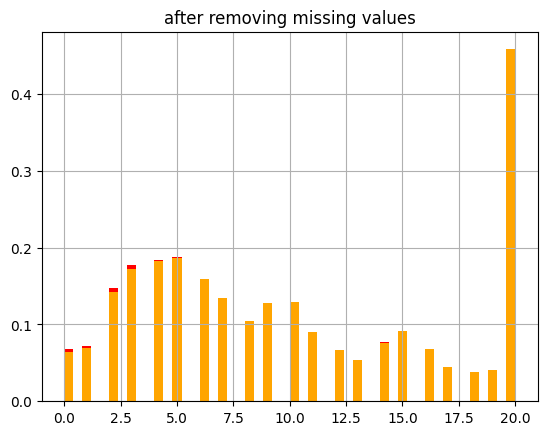

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original data
df['experience'].hist(bins=50,ax=ax,density=True,color='red')
plt.title('before removing missing values')

#new data with cca application
new_df['experience'].hist(bins=50,ax=ax,density=True,color='orange')
plt.title('after removing missing values')

**to check that your missing data was completely missing at random:**

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

on enrolled_university:

In [20]:
temp = pd.concat([
    #percentage of observation per category, original data
    df['enrolled_university'].value_counts() / len(df),

    #percentage of observations per category, cca data
    new_df['enrolled_university'].value_counts() / len(new_df)
],
axis=1)

#add column

temp.columns=['original','cca']

temp


,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


first you check the categories of all teh categorical columns for example:

on education level:

In [23]:
temp = pd.concat([
    #percentage of observation per category, original data
    df['education_level'].value_counts() / len(df),

    #percentage of observations per category, cca data
    new_df['education_level'].value_counts() / len(new_df)
],
axis=1)

#add column

temp.columns=['original','cca']

temp


,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


here we will check that if our orginal observation per category must not have a large diffrence beween before and after removing the missing values and confirms that the missing data was random

on city_development_index:

In [25]:
temp = pd.concat([
    #percentage of observation per category, original data
    df['city_development_index'].value_counts() / len(df),

    #percentage of observations per category, cca data
    new_df['city_development_index'].value_counts() / len(new_df)
],
axis=1)

#add column

temp.columns=['original','cca']

temp


,original,cca
city_development_index,,
0.920,0.265059,0.277733
0.624,0.136705,0.137760
0.910,0.078401,0.081364
0.926,0.067700,0.069200
0.698,0.034659,0.033058
...,...,...
0.649,0.000209,0.000175
0.807,0.000209,0.000233
0.781,0.000157,0.000175


on training_hours:

In [27]:
temp = pd.concat([
    #percentage of observation per category, original data
    df['training_hours'].value_counts() / len(df),

    #percentage of observations per category, cca data
    new_df['training_hours'].value_counts() / len(new_df)
],
axis=1)

#add column

temp.columns=['original','cca']

temp


,original,cca
training_hours,,
28.0,0.016703,0.017809
18.0,0.014563,0.015074
12.0,0.014563,0.014958
22.0,0.014250,0.015074
50.0,0.014041,0.014841
...,...,...
272.0,0.000261,0.000233
240.0,0.000261,0.000291
234.0,0.000261,0.000233


on experience:

In [28]:
temp = pd.concat([
    #percentage of observation per category, original data
    df['experience'].value_counts() / len(df),

    #percentage of observations per category, cca data
    new_df['experience'].value_counts() / len(new_df)
],
axis=1)

#add column

temp.columns=['original','cca']

temp


,original,cca
experience,,
20.0,0.179246,0.183331
5.0,0.074642,0.074613
4.0,0.073233,0.073042
3.0,0.070675,0.068793
6.0,0.063472,0.063555
2.0,0.058827,0.057036
7.0,0.053659,0.053952
10.0,0.051415,0.051740
9.0,0.051154,0.051158
